#### Student Performance Indicator
##### Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

1) Problem statement
* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

#### 2.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the CSV Data as Pandas DataFrame
df = pd.read_csv(r'F:\AI Projects\ML Project\notebook\Data\stud.csv')


### Show Top 5 Records

In [3]:
df.head()  # Show Top 5 Records

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [9]:
df.shape

(1000, 8)

#### 2.2 Dataset information

* Gender : Sex of students -> Male or Female
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score : score in math test
* reading score : score in reading test
* writing score : score in writing test


  


3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column
* Check the distribution of numerical columns
* Check the correlation between numerical columns
* Check the distribution of categorical columns
* Check the relationship between categorical and numerical columns
* Check the relationship between numerical columns
* Check the relationship between categorical columns





3.1 Check Missing values

In [11]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset.

3.2 Check Duplicates


In [13]:
df.duplicated().sum()  # Check for duplicate rows

0

There are no duplicate rows in the dataset.

3.3 Check data types

In [1]:
df.info()  # Get DataFrame Information

NameError: name 'df' is not defined

There are 5 numerical columns and 3 categorical columns in the dataset.

3.4 Checking the number of unique values of each column


In [17]:
df.nunique().sort_values(ascending=False)  # Get Unique Values Count in Each Column

math_score                     81
writing_score                  77
reading_score                  72
parental_level_of_education     6
race_ethnicity                  5
gender                          2
lunch                           2
test_preparation_course         2
dtype: int64

There are 81 unique values in the 'math score' column, 77 unique values in the 'reading score' column, and 73 unique values in the 'writing score' column. The categorical columns have fewer unique values.

3.5 Check statistics of data set


In [18]:
df.describe()  # Get Statistical Summary of Numerical Columns

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights from statistical summary:
- The average math score is 66.089, reading score is 69.169, and writing score is 68.054.
- The maximum scores in math, reading, and writing are 100, while the minimum scores are 0.
- The standard deviation indicates the variability in scores, with math having the highest variability (15.188), followed by writing (10.645) and reading (11.978).         

Insight


3.7 Exploring Data


In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
print("Categories in 'gender' variable:", df['gender'].unique())
print(f"Categories in 'race_ethnicity' variable: {df['race_ethnicity'].unique()}")
print(f"Categories in 'parental level of education' variable: {df['parental_level_of_education'].unique()}")
print(f"Categories in 'lunch' variable: {df['lunch'].unique()}")
print(f"Categories in 'test preparation course' variable: {df['test_preparation_course'].unique()}")

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [36]:
# define numerical & categorical columns
numeric_features = [a for a in df.columns if df[a].dtype!='O']
numeric_features

['math_score', 'reading_score', 'writing_score']

In [37]:
categorical_features = [a for a in df.columns if df[a].dtype=='O']
categorical_features    

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [41]:
# print columns
print("we have {} numerical features: {}". format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


ValueError: Could not interpret value `average` for `x`. An entry with this name does not appear in `data`.

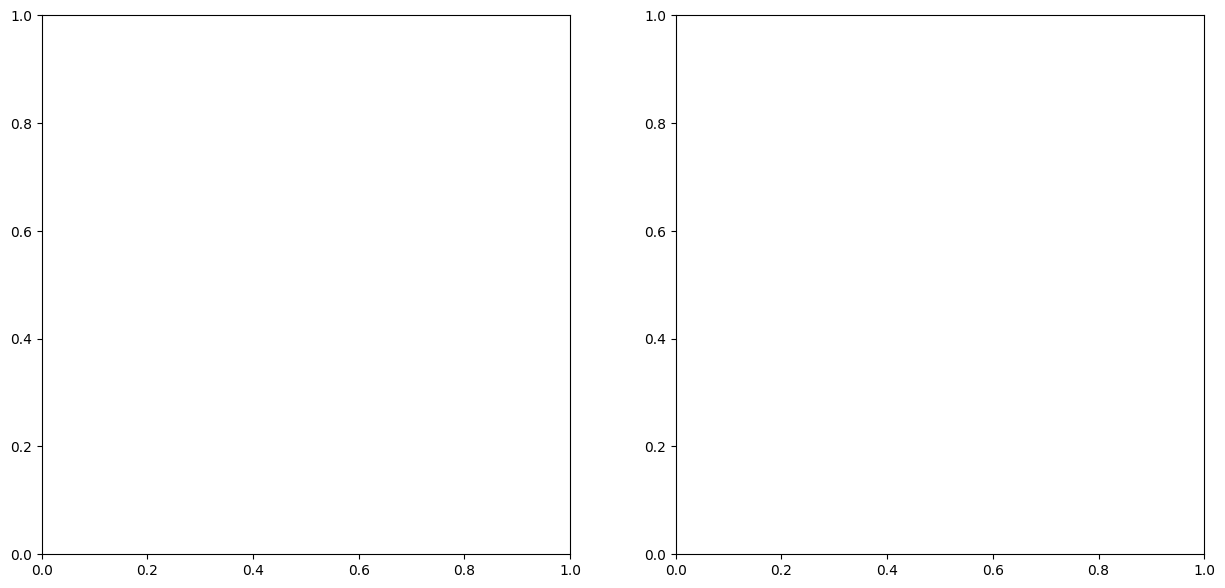

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()